In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('insurance_data.csv')

In [3]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [6]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [7]:
df.shape

(27, 2)

In [56]:
df=df.drop_duplicates(subset=['age'])

In [57]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [58]:
df.shape

(24, 2)

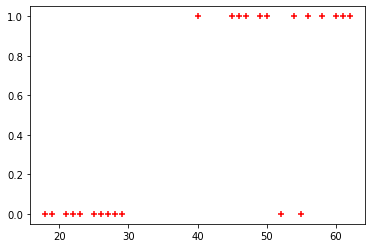

In [59]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8,test_size=0.2)

In [62]:
X_train

,age
20,21
6,55
5,56
12,27
18,19
9,61
1,25
0,22
7,60
13,29


In [63]:
X_test

,age
14,49
10,18
21,26
26,23
17,58


In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression()

In [66]:
model.fit(X_train,Y_train)

LogisticRegression()

In [67]:
X_test

,age
14,49
10,18
21,26
26,23
17,58


In [68]:
y_predict = model.predict(X_test)

In [69]:
model.score(X_test,Y_test)

1.0

In [70]:
model.predict_proba(X_test)

array([[0.25395543, 0.74604457],
       [0.97180698, 0.02819302],
       [0.91280822, 0.08719178],
       [0.94242082, 0.05757918],
       [0.08179145, 0.91820855]])

In [71]:
y_predict

array([1, 0, 0, 0, 1], dtype=int64)

#### model.coef_ indicates value of m in y=m*x+b

In [72]:
model.coef_

array([[0.14895836]])

#### model.intercept_ indicates value of b in y=m*x+b

In [73]:
model.intercept_

array([-6.22133312])

In [74]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [80]:
def prediction_function(age):
    z=0.15 * age + (-6.22)
    y=sigmoid(z)
    return y

In [82]:
age = 49
prediction_function(age)

0.7558388990947971

#### 0.755 is greater than 0.5 which means person with age 49 will buy the insurance

In [83]:
age =18
prediction_function(age)

0.02874849592653997

#### 0.02 is smaller than 0.5 which means the person with age 18 will not buy insurance